In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results
from omegaconf import OmegaConf
from main import load_data
from model import AEDist
import numpy as np
import os
import glob
import torch

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
sweep_id = 't2nhfazc'

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [3]:
run_id = 'effsqvv4'

In [4]:
run = [run for run in sweep.runs if run.id == run_id][0]

In [5]:
cfg = OmegaConf.create(run.config)
folder_path = "../src/wandb/"
folder_list = glob.glob(f"{folder_path}*{run.id}*")
ckpt_files = glob.glob(f"{folder_list[0]}/files/*.ckpt")
ckpt_path = ckpt_files[0]
data_path = os.path.join(cfg.data.root, cfg.data.name + cfg.data.filetype)
data = np.load(data_path, allow_pickle=True)
# model = AEDist(dim=50, emb_dim=10)
# model.load_from_checkpoint(ckpt_path)
model = AEDist.load_from_checkpoint(ckpt_path)
model.eval()
x_all = torch.tensor(data['data'], dtype=torch.float32)
x_pred, z_pred = model(x_all)
x_pred = x_pred.detach().cpu().numpy()
z_pred = z_pred.detach().cpu().numpy()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:281: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('mean', torch.tensor(mean, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/dmae/notebooks/../src/model.py:282: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(std, dtype=torch.float32), persistent=True)
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:269: UserWarning: Attribute 'activation_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore t

In [6]:
np.savez('../dm_data/sea_ad_all_new.npz', data=z_pred, train_mask=data['is_train'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

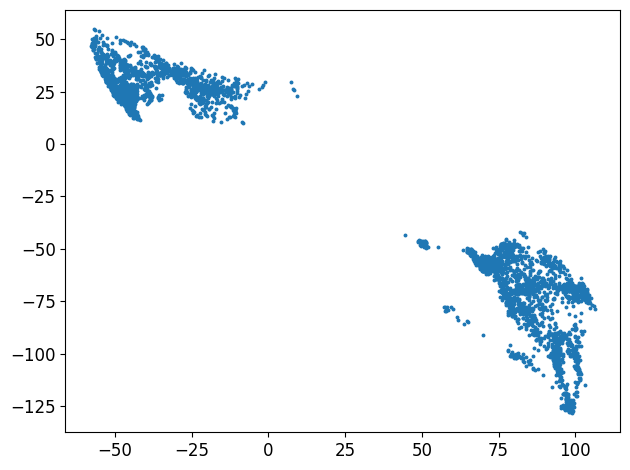

In [7]:
scprep.plot.scatter2d(z_pred)

In [8]:
from scipy.spatial.distance import pdist, squareform

In [9]:
distpred = squareform(pdist(z_pred))

In [10]:
distpred

array([[  0.        , 149.4265028 , 143.64429601, ..., 277.81750432,
        264.20071746, 217.71624696],
       [149.4265028 ,   0.        ,  22.97424148, ..., 308.69250927,
        293.03603178, 253.03247789],
       [143.64429601,  22.97424148,   0.        , ..., 309.68302789,
        295.21901168, 257.24733591],
       ...,
       [277.81750432, 308.69250927, 309.68302789, ...,   0.        ,
         68.76680663, 213.18575537],
       [264.20071746, 293.03603178, 295.21901168, ...,  68.76680663,
          0.        , 184.77346396],
       [217.71624696, 253.03247789, 257.24733591, ..., 213.18575537,
        184.77346396,   0.        ]])

In [11]:
disttrue = data['dist']

In [12]:
disttrue

array([[  0.        , 154.48850378, 146.24750569, ..., 280.42653318,
        260.48310905, 215.62482804],
       [154.48850378,   0.        ,  24.43887651, ..., 312.04844101,
        293.77590204, 254.20699534],
       [146.24750569,  24.43887651,   0.        , ..., 316.4417705 ,
        299.08025457, 261.05909372],
       ...,
       [280.42653318, 312.04844101, 316.4417705 , ...,   0.        ,
         78.40329479, 217.22535675],
       [260.48310905, 293.77590204, 299.08025457, ...,  78.40329479,
          0.        , 186.14091448],
       [215.62482804, 254.20699534, 261.05909372, ..., 217.22535675,
        186.14091448,   0.        ]])

In [13]:
z_pred2 = model.encode(x_all)

In [14]:
z_pred2

tensor([[-23.8152,  22.0277, -66.8145,  ..., -11.2050, -11.1553,  75.0906],
        [-47.9042,  23.1929, -80.0171,  ..., -24.0269, 103.0068,  68.8858],
        [-44.1049,  28.6316, -81.2536,  ..., -30.6655, 105.7278,  71.8703],
        ...,
        [ 89.9449, -96.5797, -60.8669,  ..., 120.9684,  88.1868,  91.9828],
        [ 85.0478, -80.4575, -60.3698,  ...,  81.7280,  77.3094,  56.0875],
        [ 50.5733, -47.5277, -33.5485,  ...,  58.9673,  13.9137, -49.9730]],
       grad_fn=<AddmmBackward0>)

In [15]:
z_pred

array([[-23.81516 ,  22.027693, -66.814545, ..., -11.204962, -11.155289,
         75.09058 ],
       [-47.904224,  23.192907, -80.017075, ..., -24.026867, 103.00677 ,
         68.88576 ],
       [-44.104874,  28.631588, -81.25359 , ..., -30.665482, 105.727776,
         71.8703  ],
       ...,
       [ 89.94488 , -96.57973 , -60.866936, ..., 120.968414,  88.186844,
         91.982765],
       [ 85.04781 , -80.457466, -60.369804, ...,  81.72801 ,  77.30938 ,
         56.0875  ],
       [ 50.57326 , -47.527737, -33.548515, ...,  58.967278,  13.913675,
        -49.973034]], dtype=float32)

In [16]:
model.std

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [17]:
x_pred

array([[-4.6199193e+00, -2.8287261e+00,  1.0312467e+01, ...,
        -2.9340568e-01,  2.3155481e-02,  2.9747194e-02],
       [-1.0035979e+01, -1.3555828e+00, -5.7939420e+00, ...,
         6.8756834e-02,  1.9819915e-02, -2.8627422e-01],
       [-9.1999788e+00, -9.9997002e-01, -4.2473145e+00, ...,
        -5.9372768e-02, -2.0667978e-02,  1.0256343e-01],
       ...,
       [ 7.0858421e+00,  1.3298547e-01,  1.3289951e+00, ...,
         8.8662930e-02, -1.4251621e-01, -5.9968922e-03],
       [ 8.1095161e+00,  8.8632244e-01,  6.1550784e-01, ...,
         2.6095556e-02,  1.8265104e-01,  1.3934890e-02],
       [-3.7115819e+00,  7.4737722e-01, -4.5973577e+00, ...,
        -1.4990732e-02, -3.7270989e-02, -2.7006863e-02]], dtype=float32)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

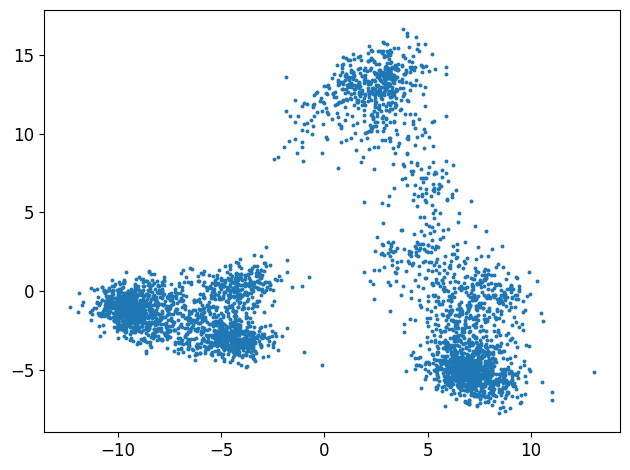

In [18]:
scprep.plot.scatter2d(data['data'])

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

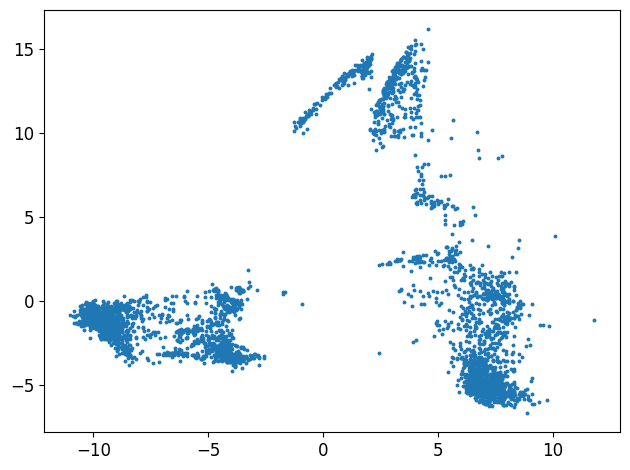

In [19]:
scprep.plot.scatter2d(x_pred)

In [20]:
trainloader, valloader, X, phate_coords, colors, dist, pp, mean, std = load_data(cfg, load_all=False)

In [21]:
X

array([[-10.46617721,  -0.95093263,  -5.2972538 , ...,  -0.16828052,
         -0.35368801,  -0.0993046 ],
       [ -7.37856994,  -2.23530496,  -3.65967924, ...,   0.11808633,
         -0.30824108,   1.97837889],
       [  7.00164642,  -5.94825703,  -1.99004338, ...,  -0.08539368,
          0.50895143,   0.19518583],
       ...,
       [  7.19824663,  -3.35571747,  -1.24761792, ...,   0.21685389,
         -0.68819915,   0.56238553],
       [  8.63828552,   1.5362315 ,   0.49099461, ...,   0.20677386,
         -0.83919563,  -0.1976006 ],
       [ -4.05364096,   1.48017214,  -4.77429341, ...,  -0.50300701,
          0.31974488,  -0.38377685]])

In [22]:
data['data']

array([[ -4.29178192,  -2.61579511,  11.55192702, ...,  -0.38976693,
         -0.57641231,  -0.51882825],
       [-10.46617721,  -0.95093263,  -5.2972538 , ...,  -0.16828052,
         -0.35368801,  -0.0993046 ],
       [ -7.37856994,  -2.23530496,  -3.65967924, ...,   0.11808633,
         -0.30824108,   1.97837889],
       ...,
       [  7.11025589,   0.8637902 ,   2.09746328, ...,   0.05903687,
          0.61823007,   0.42162645],
       [  8.63828552,   1.5362315 ,   0.49099461, ...,   0.20677386,
         -0.83919563,  -0.1976006 ],
       [ -4.05364096,   1.48017214,  -4.77429341, ...,  -0.50300701,
          0.31974488,  -0.38377685]])

In [23]:
data['data'][data['is_train']]

array([[-10.46617721,  -0.95093263,  -5.2972538 , ...,  -0.16828052,
         -0.35368801,  -0.0993046 ],
       [ -7.37856994,  -2.23530496,  -3.65967924, ...,   0.11808633,
         -0.30824108,   1.97837889],
       [  7.00164642,  -5.94825703,  -1.99004338, ...,  -0.08539368,
          0.50895143,   0.19518583],
       ...,
       [  7.19824663,  -3.35571747,  -1.24761792, ...,   0.21685389,
         -0.68819915,   0.56238553],
       [  8.63828552,   1.5362315 ,   0.49099461, ...,   0.20677386,
         -0.83919563,  -0.1976006 ],
       [ -4.05364096,   1.48017214,  -4.77429341, ...,  -0.50300701,
          0.31974488,  -0.38377685]])